<span style="font-size:3em"> CORRECTION: Model-based statistical learning</span> 


*Charles Bouveyron, Pierre-Alexandre Mattei and Aude Sportisse*

# Exercise 1: Gaussian mixtures for MCAR data (20pt)

Let $X \in \mathbb{R}^{n \times d}$ a dataset which contains missing values. The missing-data pattern $M \in \{0,1\}^{n\times d}$ is a binary matrix which indicates where are the missing values in $X$: $m_{ij}=1$ is $x_{ij}$ is missing, $m_{ij}=0$ otherwise. Let us denote $x_i^{\mathrm{obs}}$ (resp. $x_i^{\mathrm{mis}}$) the values of the observed variable(s) (resp. the values of the missing variable(s)) for the individual $i$. 

The aim of model-based clustering is to estimate an (unknown) partition of the data $X$ in $K$ groups. This partition is denoted as $Z=(z_1|\dots|z_n)^T \in \{0,1\}^{n\times K}$ with $z_i=(z_{i1},\dots,z_{iK})^T \in \{0,1\}^{K}$ and where $z_{ik}=1$ if $x_i$ belongs to the class $k$, $z_{ik}=0$ otherwise. In this context, note that both $x_i^{\textrm{mis}}$ and $z_i$ are missing. 
In the following, we assume that the data are missing completely at random (MCAR).

## Introduction (~2pt)

### Give the definition of the MCAR mechanism and what it implies for the statistical analysis.

**Answer**: 

We consider i.i.d. data $x_1,\dots,x_n$ ($x_i \in \mathbb{R}^d$) genereted under a Gaussian mixture model with $K$ clusters and the following density: 
$$ p_\theta(x)=\sum_{k=1}^K \pi_k f_k(x;\mu_k,\Sigma_k),$$

with $\theta=(\pi_1,\dots,\pi_K,\mu_1,\dots,\mu_K,\Sigma_1,\dots,\Sigma_K)$ and $f_k$ is the Gaussian density function. $\forall k \in \{1,\dots,K\}, \mu_k\in \mathbb{R}^d$ and $\Sigma_k \in \mathbb{R}^{d\times d}$. 

### Recall in which spaces the parameters live.

**Answer**: 

The goal of this exercise is to implement an EM algorithm for a Gaussian mixture model when the data are missing (MCAR).

The EM algorithm is an iterative algorithm that permits to maximize the likelihood function under missingness. Let be $\theta^{[0]}$ the initialization point. The iteration $[r]$ of the algorithm consists in proceeding:

* the **E-step**: computation of $Q(\theta;\theta^{[r-1]})=\mathbb{E}[\ell(\theta;X,Z)|X^{\mathrm{obs}};\theta^{[r-1]}],$
where $\ell(\theta;X,Z)$ is the complete log-likelihood.

* the **M-step**: update of the parameters by maximizing the function $Q(\theta;\theta^{[r-1]})$:
$$\theta^{[r]}=\mathrm{argmax}_{\theta} Q(\theta;\theta^{[r-1]}).$$

Note that

$$\ell(\theta;X,Z)=\log\left(\prod_{i=1}^n p_\theta(x_i)\right)= \sum_{i=1}^n\sum_{k=1}^K z_{ik} \log(\pi_k f_k(x_i;\mu_k,\Sigma_k))$$

We can show that $$Q(\theta;\theta^{[r-1]}=\sum_{i=1}^n\sum_{k=1}^K t_{ik}(\theta^{[r-1]}) [\log(\pi_k) + \tau_x(\mu_k,\Sigma_k;x_i^\mathrm{obs},\theta^{[r-1]})]$$


## E-step (~6pt)

### Explicit the terms $t_{ik}$ and $\tau_x$ as conditional probability and conditional expectation. 

**Answer**: 

**Correction**: $t_{ik}(\theta^{[r-1]})=\mathbb{P}(z_{ik}=1|x_i^{\mathrm{obs}};\theta^{[r-1]})$ and $\tau_x(\mu_k,\Sigma_k;x_i^\mathrm{obs},\theta^{[r-1]})=\mathbb{E}[\log(f_k(x;\mu_k,\Sigma_k))|x_i^\mathrm{obs},z_{ik}=1;\theta^{[r-1]}]$

### Write the term $t_{ik}$.

**Answer**:

**Correction**: $$t_{ik}(\theta^{[r-1]})=\frac{f(z_{ik}=1,  x_i^{\mathrm{obs}};\theta^{[r-1]})}{\sum_{h=1}^{K}f(z_{ih}=1,x_i^{\mathrm{obs}};\theta^{[r-1]})}=\frac{\pi_k^{[r-1]}f(x_i^{\mathrm{obs}};\mu_k^{[r-1]},\Sigma_k^{[r-1]})}{\sum_{h=1}^{K}\pi_h^{[r-1]}f(x_i^{\mathrm{obs}};\mu_h^{[r-1]},\Sigma_h^{[r-1]})}$$

To compute $\tau_x$, we have to make explicit the distribution $f(x_i^\mathrm{mis}|x_i^\mathrm{obs},z_{ik}=1;\theta^{[r-1]})$. 

Up to a reorganization of the variables, we have

$$f(x_i|z_{ik}=1;\theta^{[r-1]})=f\left(\begin{pmatrix} x_i^\mathrm{obs} \\ x_i^\mathrm{mis} \end{pmatrix}|z_{ik}=1;\theta^{[r-1]}\right)=\mathcal{N}\left(\begin{pmatrix} (\mu_{ik}^\mathrm{obs})^{[r-1]} \\ (\mu_{ik}^\mathrm{mis})^{[r-1]} \end{pmatrix}, \begin{pmatrix} (\Sigma_{ik}^{\mathrm{obs},\mathrm{obs}})^{[r-1]} & (\Sigma_{ik}^{\mathrm{obs},\mathrm{mis}})^{[r-1]} \\ (\Sigma_{ik}^{\mathrm{obs},\mathrm{mis}})^{[r-1]} & (\Sigma_{ik}^{\mathrm{mis},\mathrm{mis}})^{[r-1]} \end{pmatrix}\right),$$

where 

* $(\mu_{ik}^\mathrm{obs})^{[r-1]}$ (resp. $(\mu_{ik}^\mathrm{mis})^{[r-1]}$) is the values of the vector $(\mu_{ik})^{[r-1]}$ for the observed variables (resp. for the missing variables),

* $(\Sigma_{ik}^{\mathrm{obs},\mathrm{obs}})^{[r-1]}$ is sub-matrix of $\Sigma_{ik}^{[r-1]}$ for the observed variables only.

Therefore, we have: 

$$\left( x_i^{\mathrm{mis}} \mid  x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]} \right) \sim \mathcal{N}\left((\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]},(\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]}\right)$$

### Explicit $(\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]}$ and $(\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]}$.

**Hint 1:** use the classic formulae for the conditional expectation of Gaussian variables https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions.


**Answer**:

**Correction:** We have:
$$(\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]} = ({\mu}_{ik}^{\mathrm{mis}})^{[r-1]} + ({\Sigma}_{ik}^{\mathrm{mis},\mathrm{obs}})^{[r-1]} \left(({\Sigma}_{ik}^{\mathrm{obs},\mathrm{obs}})^{[r-1]}\right)^{-1} \left(x_i^{\mathrm{obs}} - ({\mu}_{ik}^{\mathrm{obs}})^{[r-1]} \right)$$
and 
$$(\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]} = ({\Sigma}_{ik}^{\mathrm{mis},\mathrm{mis}})^{[r-1]} - ({\Sigma}_{ik}^{\mathrm{mis},\mathrm{obs}})^{[r-1]} \left(({\Sigma}_{ik}^{\mathrm{obs},\mathrm{obs}})^{[r-1]}\right)^{-1} ({\Sigma}_{ik}^{\mathrm{obs},\mathrm{mis}})^{[r-1]}.$$



The term $\tau_x$ is written as follows:
$$\tau_x(\mu_k,\Sigma_k;x_i^\mathrm{obs},\theta^{[r-1]})=\frac{1}{2}\left[n\log(2\pi) + \log((\mid\Sigma_k\mid)) \right]
-\frac{1}{2}\mathbb{E}\left[ (x_i - \mu_k)^T(\Sigma_k)^{-1}(x_i - \mu_k)   \mid x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]}\right].$$

This last term could be expressed using the commutativity and linearity of the trace function:
$$\mathbb{E}\left[ (x_i - \mu_k)^T(\Sigma_k)^{-1}(x_i - \mu_k)   \mid x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]} \right] \\
= \mbox{tr}(\mathbb{E}\left[ (x_i - \mu_k)(x_i - \mu_k)^T   \mid x_i^{\mathrm{obs}},z_{ik}=1,c_i;\theta^{[r-1]} \right](\Sigma_k)^{-1}).$$

Therefore, to compute $\tau_x$, only $\mathbb{E}\left[ (x_i - \mu_k)(x_i - \mu_k)^T   \mid x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]} \right]$ has to be calculated. 



### Compute $\tau_x$.

**Hint 2** : up to a reorganization of the variables, we have
$$(x_i - \mu_k)(x_i - \mu_k)^T =  \begin{pmatrix}
(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}}) &(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})\\
(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})^T(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}}) &(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})^T(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})
\end{pmatrix}.$$
You can compute the expected value for each block. 

**Answer**:

**Correction:** 
 The expected value of each block for the current parameter value is
$$
\mathbb{E}\left[ (x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})  \mid x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]} \right] = (x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T(x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})$$

$$\mathbb{E}\left[ (x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})  \mid x_i^{\mathrm{obs}},z_{ik}=1;\theta^{[r-1]}\right] = (x_i^{\mathrm{obs}} - \mu_{ik}^{\mathrm{obs}})^T((\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]} - \mu_{ik}^{\mathrm{mis}})$$

$$\mathbb{E}\left[ (x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})^T(x_i^{\mathrm{mis}} - \mu_{ik}^{\mathrm{mis}})   \mid x_i^{\mathrm{obs}},z_{ik}=1;\lambda^{[r-1]} \right] =
((\tilde{\mu}_{ik}^{\mathrm{mis}} )^{[r-1]}- \mu_{ik}^{\mathrm{mis}})^T((\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]} - \mu_{ik}^{\mathrm{mis}})+(\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]}
$$

To conclude, the E-step consists of computing the following quantities:
$(\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]}$, $(\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]}$ and $t_{ik}(\theta^{[r-1]}$. 


## M-step 

Let us denote $(\tilde{x}_{ik})^{[r-1]} = (x_i^{\mathrm{obs}},(\tilde{\mu}_{ik}^{\mathrm{mis}})^{[r-1]})$ and 
$\tilde{\Sigma}_{ik}^{[r-1]} = \left( \begin{array}{cc}
0_i^{\mathrm{obs},\mathrm{obs}} & 0_i^{\mathrm{obs},\mathrm{mis}}\\
0_i^{\mathrm{mis},\mathrm{obs}} & (\tilde{\Sigma}_{ik}^{\mathrm{mis}})^{[r-1]}
\end{array}\right)$

The maximization of $Q(\theta;\theta^{[r-1]})$ over $(\pi,\mu,\Sigma)$ leads to, for $k=1,\ldots,K$,
$$\pi_k^{[r]} = \frac{1}{n} \sum_{i=1}^n t_{ik}(\theta^{[r-1]})$$
$$\mu_k^{[r]} = \frac{\sum_{i=1}^n t_{ik}(\theta^{[r-1]}) (\tilde{x}_{ik})^{[r-1]}}{\sum_{i=1}^n t_{ik}(\theta^{[r-1]})}$$
$$\Sigma_k^{[r]} = \frac{\sum_{i=1}^n \left[t_{ik}(\theta^{[r-1]}) \left((\tilde{x}_{ik})^{[r-1]} - \mu_k^{[r]})((\tilde{x}_{ik})^{[r-1]} - \mu_k^{[r]})^T+\tilde{\Sigma}_{ik}^{[r-1]}\right) \right]}{\sum_{i=1}^n t_{ik}(\theta^{[r-1]})}$$

## Code (~9pt)

We consider a bivariate Gaussian mixture ($d=2$) with 2 classes ($K=2$):
$$X \sim \pi_1\mathcal{N}(\mu_1,\Sigma_1)+\pi_2\mathcal{N}(\mu_2,\Sigma_2),$$
with $\mu_1=(0,0)$, $\mu_2=(3,3)$, $\pi_1=0.3,\pi_2=0.7$ and $\Sigma_1=I_{2\times 2}$, $\Sigma_2=I_{2\times 2}$

We then introduce MCAR values in $X$ (both variables are missing).

In [1]:
library(MASS)
library(mvtnorm)

In [2]:
SimuZ <- function(n,pik){
  #######Arguments
  ##n: number of observations
  ##pik: vector of size K, proportion of the K classes
  #######Values
  ##Return a matrix of size (n,K)
  
  K <- length(pik)
  Z <- matrix(0,nrow=n,ncol=length(pik))
  obs_pos <- 1:n
  for (k in 1:(K-1)){
    obs_k <- sample(obs_pos,pik[k]*n)
    Z[obs_k,k] <- 1
    obs_pos <- setdiff(obs_pos,obs_k)
  }
  Z[obs_pos,K] <- 1
  return(Z)
}

In [3]:
set.seed(2)

n <- 100
d <- 2

mu.true <- list(rep(0,d),rep(3,d))
sigma.true <- list(diag(1,d),diag(1,d)) 

K <- 2
pik.true <-  c(0.3,0.7)

## Generation of the true partition
Z.true <- SimuZ(n=n,pik=pik.true)

Partition_true <- apply(Z.true, 1, function(z) which(z==1))
                        
## Generation of the complete dataset
X <- matrix(NA,nrow=n,ncol=d)
for (k in 1:K){
    obs_k <- which(Z.true[,k]==1)
    X[obs_k, ] <- mvrnorm(n*pik.true[k] , mu.true[[k]] , sigma.true[[k]])
}

## Introduction of missing values in X
prop.miss <- 0.4
nb.miss <- floor(n*d*prop.miss)
missing_idx.mcar <- sample(n*d, nb.miss, replace = FALSE)
XNA <- X
XNA[missing_idx.mcar] <- NA 
                     
for (i in 1:n){ #to avoid that one row contains only NA
    if (sum(is.na(XNA[i,]))==d){
      num <- sample(1:d,1)
      XNA[i,num] <- X[i,num]
    }
}

In [4]:
head(XNA)

4.5994441,NA
2.5131302,4.9682624
-0.2427924,0.8234145
NA,3.0975859
3.1487466,1.7245412
0.1171338,-0.3877827


In [5]:
sum(is.na(XNA))/(n*d)

[1] 0.315

### Propose a naive initialization step for the parameters $\pi^{[0]}$, $\mu^{[0]}$ and $\Sigma^{[0]}$ using the function init_Z.

Note that for the sequel, $\pi^{[0]}$ is a vector of $k$ elements, $\mu^{[0]}$ should be a list of length $k$ containing vectors of length $d$ and $\Sigma^{[0]}$ should be a list of length $k$ containing matrices of dimension $d \times d$.

In [6]:
init_Z <- function(K,n){
    ##This function returns a random partition Z (matrix of size n,K with the rows equal to 1).
    Z.init <- t(sapply(sample(1:K, n, replace = T) , function(i) {
      res <- rep(0, K)
      res[i] <- 1
      return(res)
    }))
    return(Z.init)
}

In [7]:
init_Z(3,4)

0,1,0
0,0,1
1,0,0
0,1,0


In [ ]:
## Answer (code):
Z.init <- init_Z(K,n)
Obs_classk <- lapply(1:K, function(z){return(which(Z.init[,z]==1))})
pi.init <- ############
mu.init <- ############
sigma.init <- ############

In [8]:
## Correction: 
Z.init <- init_Z(K,n)
Obs_classk <- lapply(1:K, function(z){return(which(Z.init[,z]==1))})
pi.init <- colSums(Z.init)/n 
mu.init <- lapply(1:K, function(z){return(colMeans(XNA[Obs_classk[[z]],],na.rm=T))})
sigma.init <- lapply(1:K, function(z){return(diag(apply(XNA[Obs_classk[[z]],],2,var,na.rm=T)))})

### Compute the missing-data pattern $M$ which indicates where are the missing values in $X$. 

In [ ]:
## Answer (code):

In [9]:
## Correction: 
M <- is.na(XNA)
head(M)

FALSE,TRUE
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,FALSE


### Code the function which returns the observed log-likelihood and $t_{ik}$.

Recall that the observed log-likelihood is written as 
$$\ell(\theta;X^\mathrm{obs})=\sum_{i=1}^n \log(f(x_i^{\mathrm{obs}};\theta))=\sum_{i=1}^n \log\left(\sum_{k=1}^K f_k(x_i^{\mathrm{obs}};\mu_k,\Sigma_k)\pi_k\right)$$

Use the following function **logsumexp** to write the function **Loglikehood_obs_Gaussian** which returns the observed log-likelihood and $t_{ik}, \forall i, \forall k$.

**Hint 1:** you can use https://github.com/cbouveyron/MBSL-Course2021/blob/main/GMM_1d_notebook.ipynb

In [10]:
logsumexp <- function (x) {
    y = max(x)
    y + log(sum(exp(x - y)))
}

In [ ]:
## Answer (code):

# Arguments:
## XNA: matrix containing missing values (data matrix of size n,d)
## mu: current value of the means (list of length K, with vectors of size d)
## sigma: current value of the covariance matrices (list of length K, with matrices of size d,d)
## prop.pi: current proportion per class (vector of length K)

Loglikelihood_obs_Gaussian <- function(XNA,mu,sigma,prop.pi){

    n <- ############
    d <- ############
    M <- ############
    K <- ############


    log_tik_numerator <- matrix(0, n, K) #log_tik_numerator[i,k] = log(f(zik=1,y_i^obs))

    Pattern <- matrix(M[!duplicated(M),],nrow=sum(!duplicated(M)))

    for (i in 1:nrow(Pattern)){
        wherePat <- which(sapply(1:nrow(M),function(x) prod(M[x,]==Pattern[i,])==1))
        X_Pat <- rbind(XNA[wherePat,])
        M_Pat <- rbind(M[wherePat,])

        var_obs <- which(Pattern[i,]==0)
        X_obs <- as.matrix(X_Pat[,var_obs])
        mu_obs <- lapply(mu, function(x) x[var_obs])
        sigma_obs <- lapply(sigma , function(x) matrix(x[var_obs,var_obs],ncol=length(var_obs),nrow=length(var_obs)))

        for (k in 1:K){
            log_tik_numerator[wherePat,k] = ############ 
        }
    }

    log_tik = ############ 
    tik = ############ 
    loglik_obs = ############ 



    return(list(loglik_obs=loglik_obs,tik=tik))

}



In [11]:
## Correction: 


Loglikelihood_obs_Gaussian <- function(XNA,mu,sigma,prop.pi){

    n <- dim(XNA)[1]
    d <- dim(XNA)[2]
    M <- is.na(XNA)
    K <- length(prop.pi)

    log_tik_numerator <- matrix(0, n, K) #logprobcond[i,k] = log(f(zik=1,y_i^obs))

    Pattern <- matrix(M[!duplicated(M),],nrow=sum(!duplicated(M)))

    for (i in 1:nrow(Pattern)){
        wherePat <- which(sapply(1:nrow(M),function(x) prod(M[x,]==Pattern[i,])==1))
        X_Pat <- rbind(XNA[wherePat,])
        M_Pat <- rbind(M[wherePat,])

        var_obs <- which(Pattern[i,]==0)
        X_obs <- as.matrix(X_Pat[,var_obs])
        mu_obs <- lapply(mu, function(x) x[var_obs])
        sigma_obs <- lapply(sigma , function(x) matrix(x[var_obs,var_obs],ncol=length(var_obs),nrow=length(var_obs)))

        for (k in 1:K){
            log_tik_numerator[wherePat,k] = log(prop.pi[k]) + dmvnorm(X_obs,mean=mu_obs[[k]],sigma=sigma_obs[[k]],log=TRUE)
        }
    }


    log_tik = log_tik_numerator - apply(log_tik_numerator , 1, logsumexp)
    tik = exp(log_tik)
    loglik_obs = sum(apply(log_tik_numerator , 1, logsumexp))

    return(list(loglik_obs=loglik_obs,tik=tik))

}

### In the function **Loglikelihood_obs_Gaussian**, explain what is the object called Pattern.

**Answer**:

### Code the first iteration of both E-step and M-step.

In the case where the covariance matrix are diagonal, note that the M-step can be written as follows:

$\forall k \in \{1,\dots,K\}$:



* $\pi_k^{[r]} = \frac{1}{n} \sum_{i=1}^n t_{ik}(\theta^{[r-1]})$.



* $\forall i \in \{1,\dots,n\}, \quad \tilde{x}^{[r-1]}_{ik}=(\tilde{x}^{[r-1]}_{ik1},\dots,\tilde{x}^{[r-1]}_{ikd})\in \mathbb{R}^d$ such that $\forall j \in \{1,\dots,d\}$:
$$\tilde{x}^{[r-1]}_{ikj}=X_{ij} \mbox{ if $M_{ij}=0$ (observed) and } \tilde{x}^{[r-1]}_{ikj}=\mu_{kj}^{[r-1]} \mbox{ if $M_{ij}=1$ (missing)}.$$



* $\mu_{k}^{[r]}=(\mu_{k1}^{[r]},\dots,\mu_{kd}^{[r]})\in \mathbb{R}^d$ such that

$$\forall j \in \{1,\dots,d\}, \quad \mu_{kj}^{[r]}=\frac{\sum_{i=1}^n \tilde{x}^{[r-1]}_{ikj}t_{ik}(\theta^{[r-1]})}{\sum_{i=1}^n t_{ik}(\theta^{[r-1]})}$$



* $\forall i \in \{1,\dots,n\}, \quad \tilde{\Sigma}_{ik}^{[r-1]}=(\tilde{\Sigma}_{ikjj'}^{[r-1]})_{j\in\{1,\dots,d\},j'\in \{1,\dots,d\}} \in \mathbb{R}^{d\times d}$ such that:
$$\forall j\neq j' \in \{1,\dots,d\}, \quad \tilde{\Sigma}_{ikjj'}^{[r-1]}=0$$
and
$$\forall j \in \{1,\dots,d\}, \quad \tilde{\Sigma}^{[r-1]}_{ikjj}=0 \mbox{ if $M_{ij}=0$ (observed) and } \tilde{\Sigma}^{[r-1]}_{ikjj}=\Sigma_{ikjj}^{[r-1]} \mbox{ if $M_{ij}=1$ (missing)}.$$



* $\Sigma_{k}^{[r]}=(\Sigma_{kjj'}^{[r]})_{j\in\{1,\dots,d\},j'\in \{1,\dots,d\}}\in \mathbb{R}^{d\times d}$ such that:
$$\forall j\neq j' \in \{1,\dots,d\}, \quad \Sigma_{kjj'}^{[r]}=0$$
and
$$\forall j \in \{1,\dots,d\}, \quad \Sigma_{kjj'}^{[r]}=\frac{\sum_{i=1}^n (( \tilde{x}_{ikj}-\mu_{kj}^{[r]})( \tilde{x}_{ikj}-\mu_{kj}^{[r]}) + \tilde{\Sigma}_{ikjj}^{[r-1]}) t_{ik}(\theta^{[r-1]})}{\sum_{i=1}^n t_{ik}(\theta^{[r-1]})}$$



In [ ]:
## Answer (code):

### E-step

loglik_res <- Loglikelihood_obs_Gaussian(XNA,mu.init,sigma.init,pi.init)
tik <- loglik_res$tik

### M-step

M <- is.na(XNA)

pi.new <- ############ 

mu.new <- NULL
sigma.new <- NULL

for (k in 1:K){
  mu.new[[k]] <- numeric(d)
  sigma.new[[k]] <- matrix(0,nrow=d,ncol=d)
  for (j in 1:d){
    xtilde <- XNA[,j]
    xtilde[which(M[,j]==1)] <- ############ 
      
    mu.new[[k]][j] <- ############ 

    sigma.tilde <- numeric(n)
    sigma.tilde[which(M[,j]==1)] <- ############ 
    sigma.new[[k]][j,j] <- sum(( (xtilde - mu.new[[k]][[j]]) * (xtilde - mu.new[[k]][[j]]) + sigma.tilde) * tik[,k]) / sum(tik[,k])
  }
}



In [13]:
## Correction:

### E-step

loglik_res <- Loglikelihood_obs_Gaussian(XNA,mu.init,sigma.init,pi.init)
tik <- loglik_res$tik

### M-step

M <- is.na(XNA)

pi.new <- colSums(tik) / n

mu.new <- NULL
sigma.new <- NULL

for (k in 1:K){
  mu.new[[k]] <- numeric(d)
  sigma.new[[k]] <- matrix(0,nrow=d,ncol=d)
  for (j in 1:d){
    xtilde <- XNA[,j]
    xtilde[which(M[,j]==1)] <- mu.init[[k]][j]
      
    mu.new[[k]][j] <- sum(xtilde * tik[,k]) / sum(tik[,k])

    sigma.tilde <- numeric(n)
    sigma.tilde[which(M[,j]==1)] <- sigma.init[[k]][j,j]
    sigma.new[[k]][j,j] <- sum(( (xtilde - mu.new[[k]][[j]]) * (xtilde - mu.new[[k]][[j]]) + sigma.tilde) * tik[,k]) / sum(tik[,k])
  }
}



### Apply the EM algorithm for 50 iterations and plot the observed log-likelihood.

In [ ]:
## Answer (code):



In [14]:
## Correction:

log_obs <- c()

mu.new <- mu.init
sigma.new <- sigma.init
pi.new <- pi.init

for (it in 1:50){
    
    pi.old <- pi.new
    mu.old <- mu.new
    sigma.old <- sigma.new
    
    ### E-step

    loglik_res <- Loglikelihood_obs_Gaussian(XNA,mu.old,sigma.old,pi.old)
    tik <- loglik_res$tik
    log_obs <- c(log_obs,loglik_res$loglik_obs)

    ### M-step

    M <- is.na(XNA)
    
    pi.new <- colSums(tik) / n
    
    mu.new <- NULL
    sigma.new <- NULL

    for (k in 1:K){
      mu.new[[k]] <- numeric(d)
      sigma.new[[k]] <- matrix(0,nrow=d,ncol=d)
      for (j in 1:d){
        xtilde <- XNA[,j]
        xtilde[which(M[,j]==1)] <- mu.old[[k]][j]

        mu.new[[k]][j] <- sum(xtilde * tik[,k]) / sum(tik[,k])

        sigma.tilde <- numeric(n)
        sigma.tilde[which(M[,j]==1)] <- sigma.old[[k]][j,j]
        sigma.new[[k]][j,j] <- sum(( (xtilde - mu.new[[k]][[j]]) * (xtilde - mu.new[[k]][[j]]) + sigma.tilde) * tik[,k]) / sum(tik[,k])
      }
    }

    
}

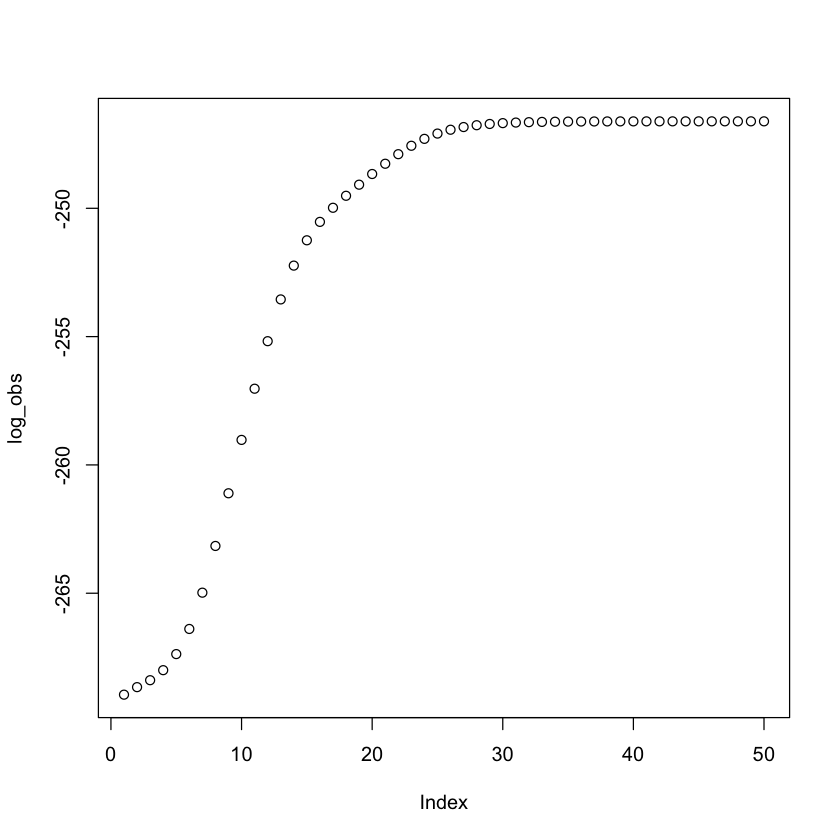

In [15]:
plot(log_obs)

## Additional questions (~3pt)

### Describe a procedure to select the number of classes.

**Answer**:

### Write the complete log-likelihood if the mechanism is MNAR. 

**Answer**: